In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.style.use("ggplot")

In [4]:
# Consider value '0' as NaN.
xm_settle = pd.read_csv("8_m_settle.csv", usecols=range(1,10), dtype=np.float32,
                        parse_dates=[0], header=0, index_col=0, na_values=0)
xm_symbols = pd.read_csv("8_m_symbols.csv", usecols=range(1,10), parse_dates=[0],
                         header=0, index_col=0, na_values=0)
expiration_months = pd.read_csv("expiration.months.csv", usecols=range(1,14), 
                                parse_dates=[0], header=0, index_col=0, na_values=0)
vix_index = pd.read_csv("vix.csv", parse_dates=[0], header=0, index_col=0, na_values=[0,"null"],
                        dtype=np.float32)

## Plot all the term structures in some large range
Helpful to get a general feeling.

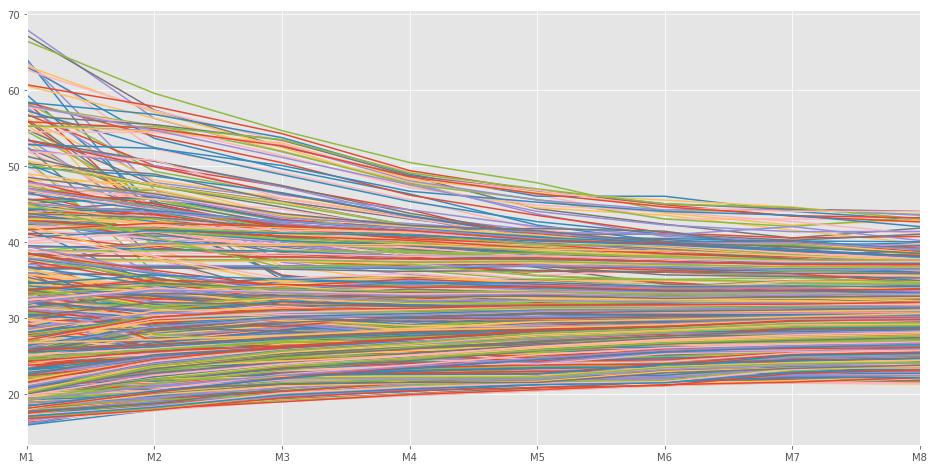

In [5]:
# Plot part of the data.
lines = xm_settle.iloc[1000:2000].T
lines.fillna(method='pad').plot(legend=False, figsize=(16,8))

## And this is a single term structure
One of the nice and clean ones.

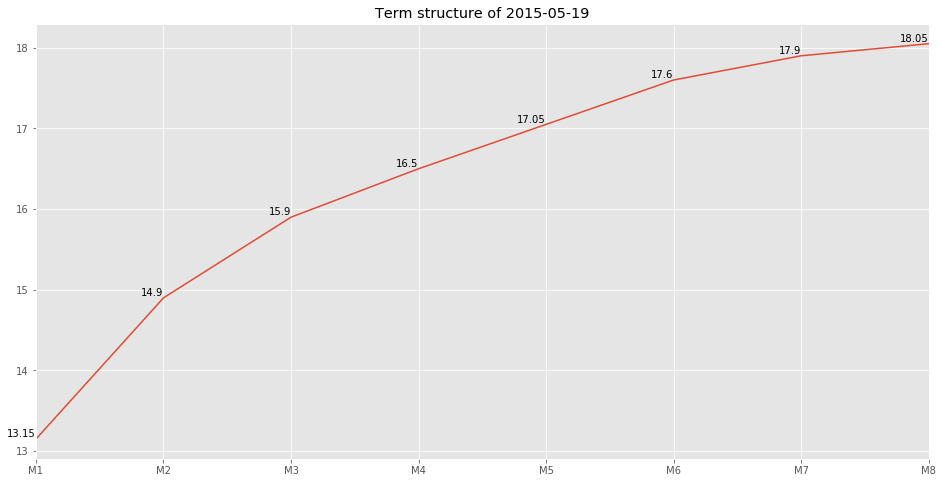

In [6]:
data_line = xm_settle.iloc[-500]
data_line.T.plot(legend=False, figsize=(16,8))
for i in range(len(data_line)):
    plt.text(i, data_line[i], data_line[i], horizontalalignment="right", verticalalignment="bottom")
plt.title(f"Term structure of {data_line.name.date()}")

## Here I plot the contangos for a large range
Notice how the fluctuation of the M2-M1 contango is the largest while it steadily decreases for later expiration months.

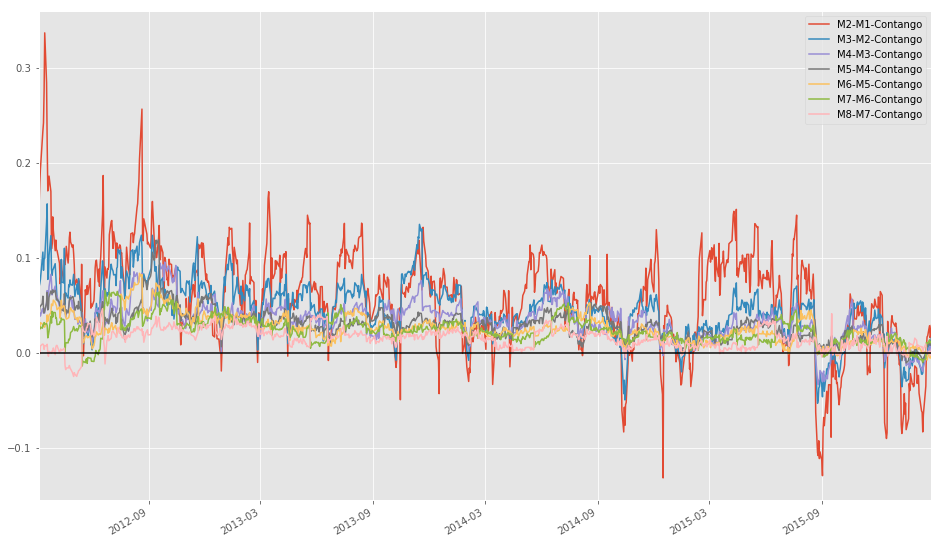

In [7]:
mxs = [xm_settle.iloc[2000:3000, i] for i in range(8)]
contangos = [(mxs[i + 1] - mxs[i]) / mxs[i] for i in range(8 - 1)]
contango_labels = ["M{}-M{}-Contango".format(i+1, i) for i in range(1,8)]
plt.figure(figsize=(16,10))
for i in range(len(contangos)):
    contangos[i].plot(label=contango_labels[i], legend=True)
plt.axhline(0, color="black")
plt.xlabel("")

In [8]:
vix = vix_index["Adj Close"]   # Only this one is needed for the index.
trainingdata = pd.merge(pd.DataFrame(vix), xm_settle, left_index=True, right_index=True)

## Experimenting with data normalization

The make sure the training error isn't exploding it's best to normalize the data so its in (-1,1)-range. Doing this as simple as possible is preferred. Too much data wrangling beforehand might introduce some unwanted prior. Wenn normalizing the data all NaN values (including 0) aren't considered because they stand for not available data and influence the result too much.

In [9]:
mean = trainingdata.mean()
ptp = trainingdata.max() - trainingdata.min()
normalized = (trainingdata - mean) / ptp

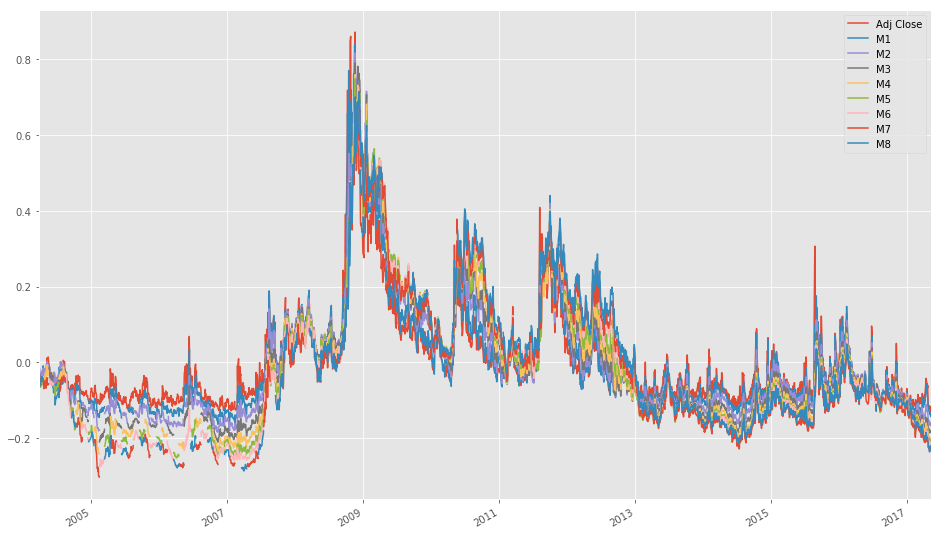

In [10]:
normalized.plot(figsize=(16,10))